# 4.3 離散型確率分布

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## 4.3.5 負の二項分布

In [4]:
# 負の二項分布の作成
r = 10
μ = 0.3
d = NegativeBinomial(r, μ)

NegativeBinomial{Float64}(r=10.0, p=0.3)

In [5]:
# 値をサンプリング
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Int64}) with eltype Int64:
 21  31  14  27  29  18  24  17  21  …  13  31  18  19  32  18  30  26  25

In [6]:
println("mean(exact) = $(mean(d)), mean(approx) = $(mean(X))")

mean(exact) = 23.333333333333336, mean(approx) = 21.88


In [7]:
println("var(exact) = $(var(d)), var(approx) = $(var(X))")

var(exact) = 77.77777777777779, var(approx) = 70.51070707070707


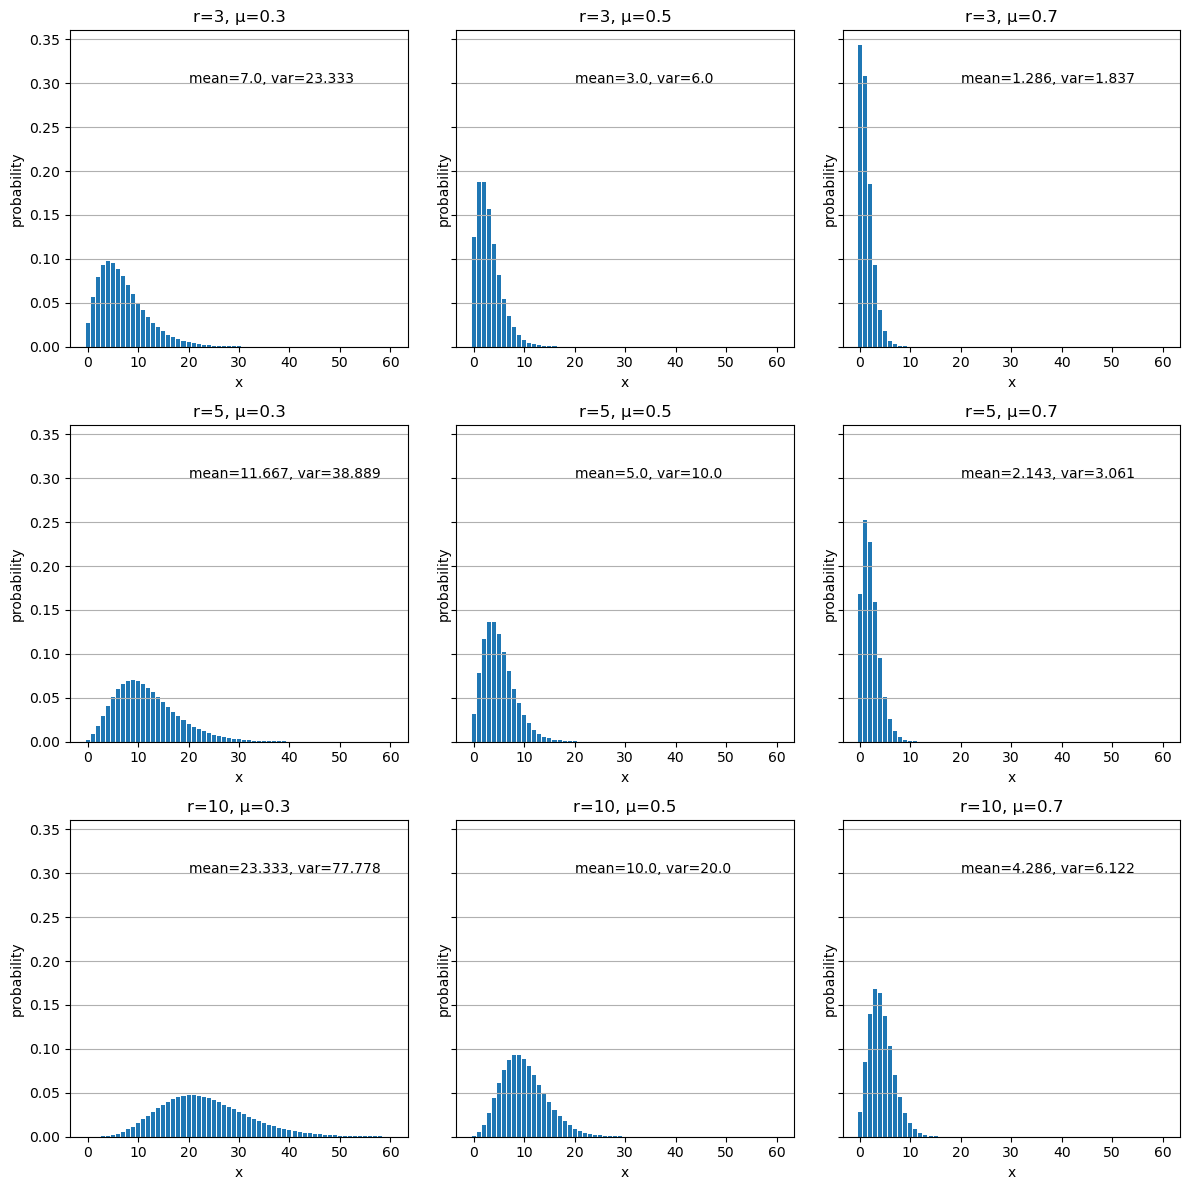

In [12]:
# 表示範囲は0から60までとする
xs = 0:60

# パラメータのリスト
rs = [3, 5, 10]
μs = [0.3, 0.5, 0.7]

fig, axes = subplots(3, 3, sharey=true, figsize=(12,12))
for (i, r) in enumerate(rs)
    for (j, μ) in enumerate(μs)
        d = NegativeBinomial(r, μ)
        axes[i,j].bar(xs, pdf.(d, xs))
        
        # 平均と分散の計算、表示は小数３桁に丸める
        m = round(mean(d), digits=3)
        v = round(var(d), digits=3)
        
        axes[i,j].text(20, 0.3, "mean=$(m), var=$(v)")
        set_options(axes[i,j], "x", "probability", "r=$(r), μ=$(μ)"; gridy=true)
    end
end
tight_layout()